In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('attacks.csv', encoding='latin1')
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df.shape

(25723, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)
df.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
7793,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df.isnull().all(axis=1)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df[df.isnull().all(axis=1)])

17020

In [9]:
df[df.duplicated()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(df[df.duplicated()])

19411

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(6312, 22)

In [13]:
df.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4874,1936.07.25,25-Jul-1936,1936.0,Unprovoked,USA,Massachusetts,"Hollywood Beach, just above Mattapoisett Harbo...",Swimming crawl stroke,"Joseph Troy, Jr",M,...,Y,15h30,White shark (identified by Dr. Hugh Smith),"B. R. Tilden, M.D.; NY Times, 7/26/1936, p.2; ...",1936.07.25-Troy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.07.25,1936.07.25,1429.0
2082,1999.12.26,26-Dec-1999,1999.0,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem Beach, Recife",Surfing,Alton Cicero da Silva,M,...,N,NaN,"Thought to involve a white, bull or tiger shark","L. A. Pereira & J. Morris; JC, 12/27/1999",1999.12.26-Cicero.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.12.26,1999.12.26,4221.0
3298,1973.08.27,27-Aug-1973,1973.0,Unprovoked,AUSTRALIA,Queensland,Palm Cove Beach,NaN,G. Cole,NaN,...,UNKNOWN,NaN,NaN,"J. Green, p.36",1973.08.27-Cole.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1973.08.27,1973.08.27,3005.0
1674,2004.05.04,04-May-2004,2004.0,Unprovoked,USA,Texas,Channel between South Padre Island & Padre Isl...,Tandem surfing,Rachel Gore,M,...,N,16h30,"Mako shark, 1.8 m [6']",G. Gore & M. Sturdevant,2004.05.04-Gore.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.05.04,2004.05.04,4629.0
4363,1953.09.27,27-Sep-1953,1953.0,Unprovoked,PHILIPPINES,Luzon Island,Bohol,NaN,Bartolome Mangubat,M,...,Y,NaN,NaN,"Palm Beach Post, 9/28/1953",1953.09.27-Mangutbal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1953.09.27,1953.09.27,1940.0


In [14]:
df.reset_index(inplace=True)
df.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [15]:
df[['Case Number.1', 'Case Number.2']].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6307     True
6308     True
6309     True
6310     True
6311     True
Length: 6312, dtype: bool

In [16]:
df.iloc[6309]

index                     6309
Case Number                  0
Date                       NaN
Year                       NaN
Type                       NaN
Country                    NaN
Area                       NaN
Location                   NaN
Activity                   NaN
Name                       NaN
Sex                        NaN
Age                        NaN
Injury                     NaN
Fatal (Y/N)                NaN
Time                       NaN
Species                    NaN
Investigator or Source     NaN
pdf                        NaN
href formula               NaN
href                       NaN
Case Number.1              NaN
Case Number.2              NaN
original order             NaN
Name: 6309, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6312 non-null   int64  
 1   Case Number             6310 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

In [18]:
pradeletar = df[df['Case Number']=='0']

In [19]:
df.drop(pradeletar.index, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 6311
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6304 non-null   int64  
 1   Case Number             6302 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

In [21]:
df.drop(columns=['Case Number.2', 'pdf', 'index', 'href formula', 'href'], inplace=True)

In [22]:
df.tail(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND.0002,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND.0001,2.0
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(6304, 18)

In [24]:
df_filtered = df[df.isna().sum(axis=1)/len(df.columns)>0.90]

In [25]:
df_filtered.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.drop(df_filtered.index, inplace=True)

In [27]:
df.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND.0002,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND.0001,2.0


In [28]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,6299.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [30]:
df['Case Number.1'] = df['Case Number.1'].map(lambda x: re.sub('\D\D$', '', x))

In [31]:
df = df.sort_values('original order')

In [32]:
df['Case Number.1'] = pd.to_datetime(df['Case Number.1'], yearfirst=True, errors='coerce')

In [33]:
df.Year.isnull().sort_values(ascending=False)

6079     True
187      True
2104    False
2094    False
2095    False
        ...  
4202    False
4203    False
4204    False
4205    False
0       False
Name: Year, Length: 6302, dtype: bool

In [34]:
df = df.reset_index(drop=True)

In [35]:
df.iloc[220:225]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
220,1836.00.00.a,1836.00.,1836.0,Unprovoked,AUSTRALIA,South Australia,NaN,NaN,NaN,NaN,NaN,"No details, it was the year the first settlers...",UNKNOWN,NaN,NaN,"A. Sharpe, p.119",NaT,222.0
221,1836.07.26.R,1836.07.26.R,1836.0,Invalid,SPAIN,NaN,NaN,NaN,NaN,NaN,NaN,"Shark caught, contained human remains",NaN,NaN,Shark involvement prior to death unconfirmed,"C. Moore, GSAF",1836-07-26,223.0
222,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1836-08-19,224.0
223,1837.00.00.a,Ca. 1837,1837.0,Invalid,USA,South Carolina,Southern Wharf,NaN,"adult male, a sailor",M,NaN,7.6 m [25'] shark caught contained human remains,NaN,NaN,Shark involvement prior to death unconfirmed,W. H. Gregg,NaT,225.0
224,1837.01.17,17-Jan-1837,1837.0,Unprovoked,AUSTRALIA,New South Wales,Macleay River,Washing his feet,Alfred Australia Howe,M,12,"FATAL Injured by shark, died of tetanus",Y,Evening,NaN,Gazette (Sydney) 1/31/1837; Proc. Royal Aust. ...,1837-01-17,226.0


In [36]:
df.Year.iloc[222]=1836

C:\Users\akati\AppData\Local\Temp\ipykernel_20332\2798721037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year.iloc[222]=1836


In [37]:
df.iloc[220:225]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
220,1836.00.00.a,1836.00.,1836.0,Unprovoked,AUSTRALIA,South Australia,NaN,NaN,NaN,NaN,NaN,"No details, it was the year the first settlers...",UNKNOWN,NaN,NaN,"A. Sharpe, p.119",NaT,222.0
221,1836.07.26.R,1836.07.26.R,1836.0,Invalid,SPAIN,NaN,NaN,NaN,NaN,NaN,NaN,"Shark caught, contained human remains",NaN,NaN,Shark involvement prior to death unconfirmed,"C. Moore, GSAF",1836-07-26,223.0
222,1836.08.19.R,Reported 19-Aug-1836,1836.0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1836-08-19,224.0
223,1837.00.00.a,Ca. 1837,1837.0,Invalid,USA,South Carolina,Southern Wharf,NaN,"adult male, a sailor",M,NaN,7.6 m [25'] shark caught contained human remains,NaN,NaN,Shark involvement prior to death unconfirmed,W. H. Gregg,NaT,225.0
224,1837.01.17,17-Jan-1837,1837.0,Unprovoked,AUSTRALIA,New South Wales,Macleay River,Washing his feet,Alfred Australia Howe,M,12,"FATAL Injured by shark, died of tetanus",Y,Evening,NaN,Gazette (Sydney) 1/31/1837; Proc. Royal Aust. ...,1837-01-17,226.0


In [38]:
df.iloc[6112:6116]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
6112,2017.01.03,03-Jan-2017,2017.0,Invalid,AUSTRALIA,New South Wales,Merimbula,Wading,Mitchell Collins,M,20,Minor injuries to foot & toes,NaN,18h00,Shark involvement not confirmed,"Illawarra Mercury, 1/7/2017",2017-01-03,6114.0
6113,2017.01.05,05-Jan-2017,2017.0,Unprovoked,USA,Florida,"Blockhouse Beach, Brevard County",Wading,male,M,47,Minor injuries to foot,N,12h30,NaN,"Florida Today, 1/5/2017",2017-01-05,6115.0
6114,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017-01-08,6116.0
6115,2017.01.09,09-Jan-2017,2017.0,Unprovoked,INDONESIA,Bali,Balian Beach,Surfing,Daniel Moore,M,48,Injury to right wrist & forearm,N,07h30,"Bull shark, 1 m","Daily Mail, 1/11/2017",2017-01-09,6117.0


In [39]:
df.Year.iloc[6114]=2017

C:\Users\akati\AppData\Local\Temp\ipykernel_20332\2568969771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Year.iloc[6114]=2017


In [40]:
df.iloc[6114]

Case Number                                         2017.01.08.R
Date                                        Reported 08-Jan-2017
Year                                                      2017.0
Type                                                     Invalid
Country                                                AUSTRALIA
Area                                                  Queensland
Location                                                     NaN
Activity                                            Spearfishing
Name                                                Kerry Daniel
Sex                                                            M
Age                                                           35
Injury                    No attack, shark made a threat display
Fatal (Y/N)                                                  NaN
Time                                                         NaN
Species                                               Bull shark
Investigator or Source   

In [41]:
df.Year.isnull().sort_values(ascending=False)

0       False
4209    False
4207    False
4206    False
4205    False
        ...  
2098    False
2097    False
2096    False
2095    False
6301    False
Name: Year, Length: 6302, dtype: bool

In [42]:
df.Year = df.Year.astype('int')

In [43]:
df['original order'] = df['original order'].astype('int')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    6302 non-null   object        
 2   Year                    6302 non-null   int32         
 3   Type                    6298 non-null   object        
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   object  

In [45]:
df.Year.value_counts().sum()

6302

In [46]:
df['Case Number.1'].dt.year.value_counts().sum()

5450

In [47]:
df2 = df.copy()

In [48]:
df2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
0,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,NaT,2
1,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",NaT,3
2,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaT,4
3,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",NaT,5
4,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",NaT,6


In [49]:
df2.drop(df2[df2['Year'] == 0].index, inplace=True)

In [50]:
df2.drop(df2[df2['Year'] < 1800].index, inplace=True)

In [51]:
df2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
169,1800.00.00,1800,1800,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,"FATAL, all onboard were killed by sharks",Y,NaN,NaN,V. C. Harvey-Brain,NaT,171
170,1801.12.18.R,Reported 18-Dec-1801,1801,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801-12-18,172
171,1802.04.13.R,Reported Apr-13-1802,1802,Unprovoked,INDIA,NaN,NaN,NaN,NaN,NaN,NaN,FATAL,Y,NaN,NaN,Evening Post (New York) 4/13/1802,1802-04-13,173
172,1803.03.00,Mar-1803,1803,Unprovoked,AUSTRALIA,Western Australia,"Hamelin Harbour, at Faure Island",NaN,M. Lefevre & a sailor (rescuer),M,NaN,Shark knocked him down & tore clothing of the ...,N,NaN,NaN,F. Peron ref in G.P. Whitley (Fishes of Austr...,NaT,174
173,1803.05.17,May-17-1803,1803,Sea Disaster,USA,South Carolina,Off Charleston,NaN,Captain Jones,M,NaN,No injury,N,NaN,NaN,"Evening Post, 6/13/1803",1803-05-17,175


In [52]:
df2.Year.value_counts().sum()

6133

In [53]:
year_count = df2.groupby('Year').size().reset_index(name='Count')

In [54]:
year_count.sort_values('Count', ascending=False).head(10)

,Year,Count
204,2015,143
206,2017,137
205,2016,130
200,2011,128
203,2014,127
202,2013,122
197,2008,122
198,2009,120
201,2012,117
196,2007,112


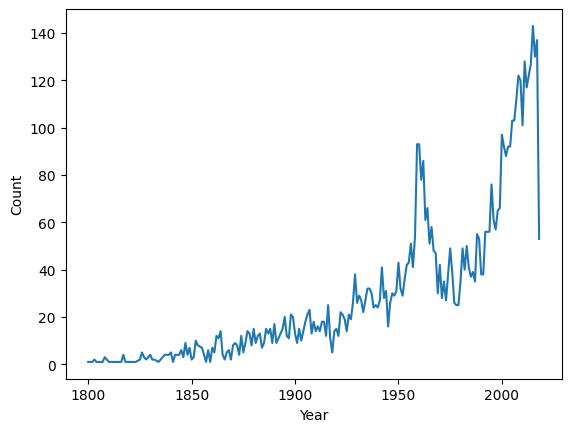

In [55]:
plt.plot(year_count['Year'], year_count['Count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [56]:
top_country = df2.groupby('Country')['Year'].count().sort_values(ascending=False)

In [57]:
top_country.to_frame().head(10)

,Year
Country,
USA,2207
AUSTRALIA,1319
SOUTH AFRICA,571
PAPUA NEW GUINEA,130
NEW ZEALAND,127
BRAZIL,112
BAHAMAS,106
MEXICO,88
ITALY,67


In [58]:
top_activity = df.Activity.value_counts(ascending=False).head(10)

In [59]:
top_activity.to_frame().head(10)

,Activity
Surfing,971
Swimming,869
Fishing,431
Spearfishing,333
Bathing,162
Wading,149
Diving,127
Standing,99
Snorkeling,89
Scuba diving,76


In [60]:
top_age = df.Age.value_counts(ascending=False)

In [61]:
top_age = top_age.reset_index()

In [62]:
top_age = top_age.rename(columns={'index':'Idade'})

In [63]:
top_age = top_age.rename(columns={'Age':'Ocorrências'})

In [64]:
top_age.head()

,Idade,Ocorrências
0,17,154
1,18,150
2,19,142
3,20,141
4,15,139


In [65]:
top_age['Idade'] = pd.to_numeric(top_age['Idade'], errors='coerce')

In [90]:
df.rename(columns={'Species ': 'Species'}, inplace=True)

In [91]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'Case Number.1', 'original order'],
      dtype='object')

In [96]:
top_species = df.Species.value_counts(ascending=False).head(10)

In [99]:
top_species = top_species.to_frame().reset_index()

In [100]:
top_species.head(1)

,index,Species
0,White shark,163


In [108]:
top_species.rename(columns={'index': 'Espécie', 'Species': 'Ataques'})

,Espécie,Ataques
0,White shark,163
1,Shark involvement prior to death was not confi...,105
2,Invalid,102
3,Shark involvement not confirmed,88
4,Tiger shark,73
5,Shark involvement prior to death unconfirmed,68
6,Bull shark,52
7,6' shark,40
8,4' shark,40
9,Questionable incident,35


In [112]:
top_area = df.Area.value_counts(ascending=False).head(10)

In [120]:
top_area = top_area.to_frame().reset_index()

In [122]:
top_area.rename(columns={'index':'Região', 'Area':'Ataques'})

,Região,Ataques
0,Florida,1037
1,New South Wales,486
2,Queensland,311
3,Hawaii,298
4,California,290
5,KwaZulu-Natal,213
6,Western Cape Province,195
7,Western Australia,189
8,South Carolina,160
9,Eastern Cape Province,160


In [124]:
df = df.rename(columns={'Sex ':'Sex'})

In [126]:
top_sex = df.Sex.value_counts(ascending=False)

In [129]:
top_sex = top_sex.to_frame().head(10)

In [133]:
top_sex = top_sex.reset_index()

In [134]:
top_sex = top_sex.rename(columns={'index':'Sexo', 'Sex':'Ataques'})

In [135]:
top_sex.head(3)

,Sexo,Ataques
0,M,5094
1,F,637
2,N,2


In [170]:
df.Sex.value_counts(normalize=True)

M      0.887921
F      0.111034
N      0.000349
M      0.000349
.      0.000174
lli    0.000174
Name: Sex, dtype: float64

In [157]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].astype('object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    6302 non-null   object        
 2   Year                    6302 non-null   int32         
 3   Type                    6298 non-null   object        
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   object  

In [166]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(lambda x: str(x).upper().strip() if not pd.isnull(x) else x)

In [168]:
df['Fatal (Y/N)'].value_counts(normalize=True)

N          0.746313
Y          0.241020
UNKNOWN    0.012320
2017       0.000174
M          0.000174
Name: Fatal (Y/N), dtype: float64

In [156]:
df['Fatal (Y/N)'].head(3)

0    Y
1    Y
2    Y
Name: Fatal (Y/N), dtype: object

In [171]:
df.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
2506,"1962,08.30.b",30-Aug-1962,1962,Boat,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,NaN,No injury,N,NaN,NaN,"C.Moore, GSAF",1962-08-30,2508
3053,1974.11.01,01-Nov-1974,1974,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,Dwayne W. Ortwine,M,24,Laceration to foot,N,Afternoon,NaN,"Daytona Beach Morning Journal, 11/2/1974",1974-11-01,3055
1361,1934.06.20,20-Jun-1934,1934,Unprovoked,USA,Florida,"Melbourne, Brevard County",Standing,"Richard Clark Best, Jr.",M,8,FATAL,Y,NaN,NaN,"New York Herald Tribune, 6/21/1934",1934-06-20,1363
6211,2017.09.06.R,Reported 06-Sep-2017,2017,Unprovoked,SOLOMON ISLANDS,NaN,Owarigi Island,Spearfishing,Bartholmew,M,NaN,Foot bitten,N,NaN,NaN,BBC,2017-09-06,6213
5371,2011.04.22,22-Apr-2011,2011,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Ronald White,M,49,Minor puncture wounds,N,15h30,1' to 2' shark,S. Petersohn,2011-04-22,5373


In [172]:
top_age

,Idade,Ocorrências
0,17.0,154
1,18.0,150
2,19.0,142
3,20.0,141
4,15.0,139
5,16.0,138
6,21.0,119
7,22.0,117
8,25.0,108
9,24.0,106


In [221]:
top_age['%'] = df.Age.value_counts(normalize=True).head(10).values

In [224]:
top_age['Idade'] = top_age.Idade.astype('int')

In [226]:
top_age

,Idade,Ocorrências,%
0,17,154,0.044368
1,18,150,0.043215
2,19,142,0.040910
3,20,141,0.040622
4,15,139,0.040046
5,16,138,0.039758
6,21,119,0.034284
7,22,117,0.033708
8,25,108,0.031115
9,24,106,0.030539


In [233]:
top_age['%'] = top_age['%'].map(lambda x: round(x*100, 2))

In [234]:
top_age

,Idade,Ocorrências,%
0,17,154,4.44
1,18,150,4.32
2,19,142,4.09
3,20,141,4.06
4,15,139,4.00
5,16,138,3.98
6,21,119,3.43
7,22,117,3.37
8,25,108,3.11
9,24,106,3.05


In [243]:
top_country = top_country.reset_index()

In [245]:
top_country.rename(columns={'Year':'Ocorrências'}, inplace=True)

,Country,Ocorrências
0,USA,2207
1,AUSTRALIA,1319
2,SOUTH AFRICA,571
3,PAPUA NEW GUINEA,130
4,NEW ZEALAND,127
...,...,...
196,NORTH SEA,1
197,NORTH ATLANTIC OCEAN,1
198,NICARAGUA,1
199,EGYPT / ISRAEL,1


In [259]:
top_country = top_country.head(10)

In [260]:
top_country['%'] = df['Country'].value_counts(normalize=True).head(10).values

C:\Users\akati\AppData\Local\Temp\ipykernel_20332\730054555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_country['%'] = df['Country'].value_counts(normalize=True).head(10).values


In [261]:
top_country

,Country,Ocorrências,%
0,USA,2207,0.356526
1,AUSTRALIA,1319,0.214012
2,SOUTH AFRICA,571,0.092610
3,PAPUA NEW GUINEA,130,0.021433
4,NEW ZEALAND,127,0.020473
5,BRAZIL,112,0.017914
6,BAHAMAS,106,0.017434
7,MEXICO,88,0.014235
8,ITALY,67,0.011356
9,PHILIPPINES,61,0.009917


In [264]:
top_country['%'] = top_country['%'].map(lambda x: round(x*100, 2))

C:\Users\akati\AppData\Local\Temp\ipykernel_20332\834118250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_country['%'] = top_country['%'].map(lambda x: round(x*100, 2))


In [265]:
top_country

,Country,Ocorrências,%
0,USA,2207,35.65
1,AUSTRALIA,1319,21.40
2,SOUTH AFRICA,571,9.26
3,PAPUA NEW GUINEA,130,2.14
4,NEW ZEALAND,127,2.05
5,BRAZIL,112,1.79
6,BAHAMAS,106,1.74
7,MEXICO,88,1.42
8,ITALY,67,1.14
9,PHILIPPINES,61,0.99


In [267]:
df.sample(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
3954,1995.08.31.b,31-Aug-1995,1995,Unprovoked,USA,Florida,"North Beach Inlet, St. Lucie County",Surfing,Jason Cablish,M,19,Left hand & forearm bitten,N,NaN,1.2 m to 1.5 m [4' to 5'] shark,"Fort Pierce Tribune, 9/1/1995",1995-08-31,3956
4790,2006.01.11,11-Jan-2006,2006,Invalid,BAHAMAS,Grand Bahama Island,Sandy Cay,Diving for lobsters,Hayward Thomas & Shalton Barr,M,NaN,"No injury, divers felt threatened by 10' pregn...",NaN,Morning,Invalid,"Bahama Journal, 1/13/2006",2006-01-11,4792
6169,2017.06.14.R,Reported 14-Jun-2017,2017,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN,"AOL.UK, 6/14/2017",2017-06-14,6171


In [306]:
only_month = df['Case Number.1'].dt.month

In [307]:
month_counts = only_month.value_counts(normalize=True)

In [309]:
month_counts

7.0     0.113394
1.0     0.101284
8.0     0.101284
9.0     0.095413
6.0     0.085505
4.0     0.077615
12.0    0.077248
10.0    0.075229
3.0     0.069908
11.0    0.069725
5.0     0.067339
2.0     0.066055
Name: Case Number.1, dtype: float64

In [310]:
month_counts = month_counts.to_frame()

In [311]:
month_counts.reset_index(inplace=True)

In [312]:
month_counts.rename(columns={'index':'Meses', 'Case Number.1': 'Ocorrências'}, inplace=True)

In [313]:
month_counts['Ocorrências'] = month_counts['Ocorrências'].map(lambda x: round(x*100, 2))

In [315]:
month_counts.Meses = month_counts.Meses.astype('int')

In [316]:
month_counts.head(12)

,Meses,Ocorrências
0,7,11.34
1,1,10.13
2,8,10.13
3,9,9.54
4,6,8.55
5,4,7.76
6,12,7.72
7,10,7.52
8,3,6.99
9,11,6.97


In [327]:
top_activity = top_activity.to_frame()

In [328]:
top_activity = top_activity.reset_index()

In [329]:
top_activity

,index,Activity
0,Surfing,0.168635
1,Swimming,0.150920
2,Fishing,0.074852
3,Spearfishing,0.057833
4,Bathing,0.028135
5,Wading,0.025877
6,Diving,0.022056
7,Standing,0.017193
8,Snorkeling,0.015457
9,Scuba diving,0.013199


In [333]:
top_activity.rename(columns=({'index':'Atividade', 'Activity':'Ocorrências'}), inplace=True)

In [336]:
top_activity['Ocorrências'] = top_activity['Ocorrências'].map(lambda x: round(x*100, 2))

In [337]:
top_activity

,Atividade,Ocorrências
0,Surfing,16.86
1,Swimming,15.09
2,Fishing,7.49
3,Spearfishing,5.78
4,Bathing,2.81
5,Wading,2.59
6,Diving,2.21
7,Standing,1.72
8,Snorkeling,1.55
9,Scuba diving,1.32


In [352]:
top_area['Ocorrências (%)'] = df.Area.value_counts(normalize=True).head(10).values

In [354]:
top_area['Ocorrências (%)'] = top_area['Ocorrências (%)'].map(lambda x: round(x*100, 2))

In [356]:
top_area.rename(columns={'index':'Cidade'}, inplace=True)

In [358]:
top_area

,Cidade,Area,Ocorrências (%)
0,Florida,1037,17.74
1,New South Wales,486,8.31
2,Queensland,311,5.32
3,Hawaii,298,5.10
4,California,290,4.96
5,KwaZulu-Natal,213,3.64
6,Western Cape Province,195,3.34
7,Western Australia,189,3.23
8,South Carolina,160,2.74
9,Eastern Cape Province,160,2.74


In [378]:
df['Species'].value_counts(normalize=True)

White shark                                           0.047055
Shark involvement prior to death was not confirmed    0.030312
Invalid                                               0.029446
Shark involvement not confirmed                       0.025404
Tiger shark                                           0.021074
                                                        ...   
5' blue shark                                         0.000289
Nurse shark, 106 cm, 28-lb, male                      0.000289
1.5 m to 1.8 m [5' to 6'] sandbar shark               0.000289
Nurse shark, 1 m                                      0.000289
Lemon shark, 3'                                       0.000289
Name: Species, Length: 1549, dtype: float64

In [379]:
white_shark = df.loc[df['Species'] == 'White shark']

In [384]:
attack_species_x_area = white_shark['Area'].value_counts(normalize=True).head(5)

In [385]:
attack_species_x_area.to_frame()

,Area
California,0.196203
Western Cape Province,0.177215
Western Australia,0.101266
South Australia,0.069620
New South Wales,0.056962


In [389]:
attack_species_x_area = attack_species_x_area.reset_index()

In [393]:
attack_species_x_area.rename(columns={'index':'Cidade', 'Area':'Incidência'}, inplace=True)

In [397]:
attack_species_x_area['Incidência'] = attack_species_x_area['Incidência'].map(lambda x: round(x*100, 2))

In [399]:
attack_species_x_area.head(3)

,Cidade,Incidência
0,California,19.62
1,Western Cape Province,17.72
2,Western Australia,10.13


In [400]:
df['Species'].value_counts(normalize=True)

White shark                                           0.047055
Shark involvement prior to death was not confirmed    0.030312
Invalid                                               0.029446
Shark involvement not confirmed                       0.025404
Tiger shark                                           0.021074
                                                        ...   
5' blue shark                                         0.000289
Nurse shark, 106 cm, 28-lb, male                      0.000289
1.5 m to 1.8 m [5' to 6'] sandbar shark               0.000289
Nurse shark, 1 m                                      0.000289
Lemon shark, 3'                                       0.000289
Name: Species, Length: 1549, dtype: float64

In [401]:
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,original order
0,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,NaT,2
1,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",NaT,3
2,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaT,4


In [404]:
morreu = df.loc[df['Fatal (Y/N)'] == 'Y']

In [406]:
morreu['Species'].value_counts(normalize=True)

White shark                                                                                       0.103044
Tiger shark                                                                                       0.058548
Bull shark                                                                                        0.035129
3.7 m [12'] shark                                                                                 0.021077
3 m [10'] shark                                                                                   0.018735
                                                                                                    ...   
Bronze whaler shark,3.7 m [12']                                                                   0.002342
3.6 m  white shark  (or bronze whaler)                                                            0.002342
White shark, 6.5 m                                                                                0.002342
Survivors said 2 species of sharks we

In [411]:
provocou = df.loc[df['Species'] == 'White shark']

In [412]:
provocou['Activity'].value_counts(normalize=True)

Surfing                                                                   0.202532
Swimming                                                                  0.120253
Fishing                                                                   0.063291
Spearfishing                                                              0.056962
Kayaking                                                                  0.037975
                                                                            ...   
Free diving / spearfishing, from paddleboard & floating on the surface    0.006329
Bathing                                                                   0.006329
Abalone diving using Hookah (near calving whales)                         0.006329
Watching seals                                                            0.006329
Paddling                                                                  0.006329
Name: Activity, Length: 70, dtype: float64